<a href="https://colab.research.google.com/github/ThunchanokChai/DPDM2023/blob/main/Classification_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

## Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

# Metadata
Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)

In [4]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11','a12','a13','a14','a15','a16']

In [5]:
credit = pd.read_csv('/content/drive/MyDrive/DPDM23_DATA/crx.data', header = None, names=col_name) # (1) Set header = None  ### ไม่มีชื่อ Cloums / หัวตาราง
print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
credit = credit[['a3','a8','a9','a10','a11','a12','a13','a15','a16']]

In [7]:
credit.isnull().any()

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

In [8]:
credit = credit.replace({'t':1,'f':0,'g':1,'p':2,'s':3,'+':1,'-':0})

In [9]:
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,1,1,1,0,1,0,1
1,4.460,3.04,1,1,6,0,1,560,1
2,0.500,1.50,1,0,0,0,1,824,1
3,1.540,3.75,1,1,5,1,1,3,1
4,5.625,1.71,1,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,0,0,1,0,0
686,0.750,2.00,0,1,2,1,1,394,0
687,13.500,2.00,0,1,1,1,1,1,0
688,0.205,0.04,0,0,0,0,1,750,0


##Try simple ML

In [10]:
import numpy as np

In [11]:
np.random.seed(seed = 10 )

In [12]:
a = np.random.randint(2, size=len(credit))

In [13]:
a

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,

In [16]:
train = credit[ a==1 ]
train.shape

(330, 9)

In [39]:
test = credit[ a==0 ]
test.shape

(360, 9)

###Split datat

In [109]:
from sklearn.model_selection import train_test_split

#####Data train

In [40]:
X_train = train.iloc[:,:-1]

In [41]:
Y_train = train.iloc[:,-1]

####Data Validate

In [111]:
X_traintrain, X_val, Y_traintrain, Y_val = train_test_split(X_train, Y_train, test_size=0.30, random_state=6) #

In [112]:
X_val

,a3,a8,a9,a10,a11,a12,a13,a15
532,2.250,0.75,1,0,0,0,1,0
606,0.040,0.04,0,0,0,0,1,0
448,1.125,0.00,0,1,1,0,1,19
641,2.250,3.50,0,0,0,1,1,141
195,5.040,1.50,1,1,8,1,1,7
...,...,...,...,...,...,...,...,...
145,2.500,2.75,1,1,6,0,1,2072
42,1.415,0.75,1,1,1,0,1,100
550,22.290,12.75,1,1,1,1,1,109
234,21.000,10.00,1,1,13,0,1,6700


In [113]:
Y_val

532    0
606    1
448    0
641    0
195    1
      ..
145    1
42     1
550    1
234    1
511    1
Name: a16, Length: 99, dtype: int64

####Data Test

In [115]:
X_test = test.iloc[:,:-1]
Y_test = test.iloc[:,-1]

#### Define - Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
from sklearn import tree

#####Train Model1

In [118]:
Dtree1 = DecisionTreeClassifier(random_state = 0, max_depth = 4)

In [119]:
Dtree1.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

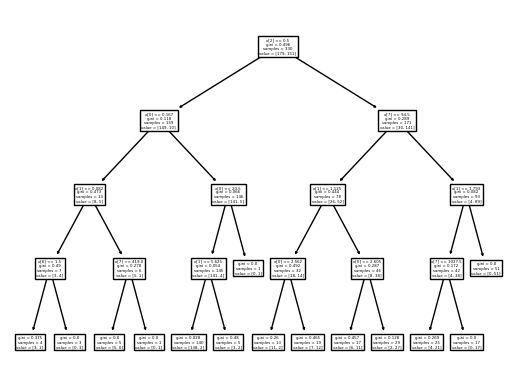

In [120]:
tree.plot_tree(Dtree1);

#####Train Model2

In [121]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_split = 50)

In [122]:
Dtree2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=0)

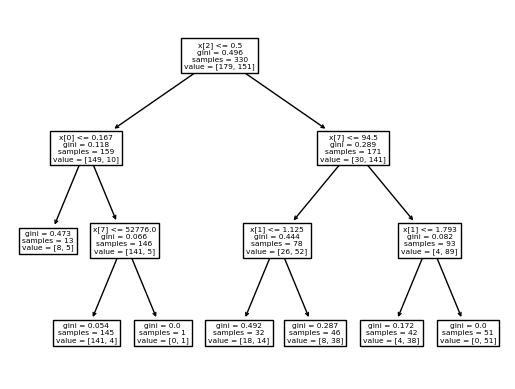

In [123]:
tree.plot_tree(Dtree2);

#####Train Model3

In [124]:
Dtree3 = DecisionTreeClassifier(random_state=0,max_depth=5,min_samples_split = 25)

In [125]:
Dtree3.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=25, random_state=0)

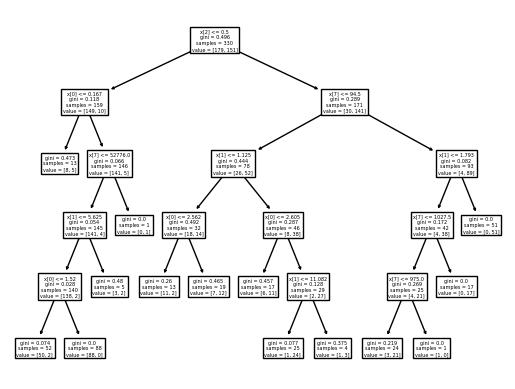

In [126]:
tree.plot_tree(Dtree3);

#### Define - Naive Bayes

#####Train Model4

In [127]:
from sklearn.naive_bayes import GaussianNB

In [128]:
# Build a Gaussian Classifier
Naive_B = GaussianNB()
Naive_B.fit(X_train, Y_train)

GaussianNB()

#### Define - Random Forest

#####Train Model5

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

# Validate model

In [135]:
from sklearn.metrics import accuracy_score

In [137]:
Y_predict1 = Dtree1.predict(X_val)
accuracy_score(Y_val,Y_predict1)

0.9393939393939394

In [138]:
Y_predict2 = Dtree2.predict(X_val)
accuracy_score(Y_val,Y_predict2)

0.9191919191919192

In [139]:
Y_predict3 = Dtree3.predict(X_val)
accuracy_score(Y_val,Y_predict3)

0.9292929292929293

In [140]:
Y_predict4 = Naive_B.predict(X_val)
accuracy_score(Y_val,Y_predict4)

0.7272727272727273

In [141]:
Y_predict5 = rf.predict(X_val)
accuracy_score(Y_val,Y_predict5)

0.98989898989899

In [ ]:
#### I would like to chose Random Forest because the accuracy_score of this method is the most

# Evaluation

#### Retrain model with full training data

In [142]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

#### Evaluation

In [143]:
from sklearn.metrics import classification_report, confusion_matrix

In [148]:
Y_predict = rf.fit(X_train, Y_train).predict(X_test)
accuracy_score(Y_test,Y_predict)

0.825

In [149]:
cm = confusion_matrix(Y_test,rf.predict(X_test))
cm

array([[168,  36],
       [ 27, 129]])

##Show Report

In [150]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       204
           1       0.78      0.83      0.80       156

    accuracy                           0.82       360
   macro avg       0.82      0.83      0.82       360
weighted avg       0.83      0.82      0.83       360

